# Exercise 2 - Good Awareness

### URI: https://www.kaggle.com/spscientist/students-performance-in-exams/version/1

https://github.com/Kaggle/kaggle-api to download kaggle dataset programmatically (not a good idea to do this over mybinder, as you need to send your login credentials)

### Question 1:
Download the data programatically with python. 

(Dont do this on mybinder! It won't work because mybinder doesnt have the api)

Windows:
1. pip install kaggle
2. log in on kaggle
3. click on your profile (top right) then my account
4. scroll down to API, click Create New API Token (this downloads the kaggle.json file with your login credentials)
5. move the kaggle.json file to the root of C:\Users\Windows-username\.kaggle\
6. .kaggle should now look like this: C:\Users\Windows-username\.kaggle\kaggle.json
7. run commands below

Mac:
https://github.com/Kaggle/kaggle-api DO IT YOURSELF!

In [14]:
!kaggle datasets download -d spscientist/students-performance-in-exams

students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
import shutil
import zipfile
with zipfile.ZipFile("students-performance-in-exams.zip","r") as zip_ref:
    zip_ref.extractall()

### Question 2:
Fit the data for the different scores in math, writing and reading into a model. present it visually and explain what you see.

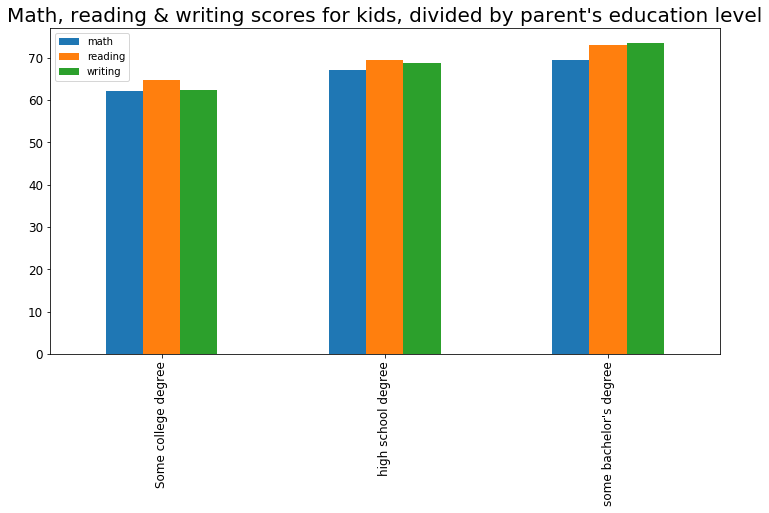

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filename = "StudentsPerformance.csv"

# reads file incl. headers from line 0
data = pd.read_csv(filename, header=0)


#print(df.headers)

data.drop([0,1])

# print(data.values)

#mathscores = data.iloc[:, 5]
#print(mathscores)

high_school_math = data[data['parental level of education']=='high school']["math score"].values
high_school_reading = data[data['parental level of education']=='high school']["reading score"].values
high_school_writing = data[data['parental level of education']=='high school']["writing score"].values

some_College_math = data[data['parental level of education']=='some college']["math score"].values
some_College_reading = data[data['parental level of education']=='some college']["reading score"].values
some_College_writing = data[data['parental level of education']=='some college']["writing score"].values

bachelor_degree_math = data[data['parental level of education']=="bachelor's degree"]["math score"].values
bachelor_degree_reading = data[data['parental level of education']=="bachelor's degree"]["reading score"].values
bachelor_degree_writing = data[data['parental level of education']=="bachelor's degree"]["writing score"].values


mydict = {'math' : [high_school_math.mean(), some_College_math.mean(), bachelor_degree_math.mean()],
     'reading' : [high_school_reading.mean(), some_College_reading.mean(), bachelor_degree_reading.mean()],
     'writing' : [high_school_writing.mean(), some_College_writing.mean(), bachelor_degree_writing.mean()]}

df = pd.DataFrame(mydict, index=['Some college degree', 'high school degree', "some bachelor's degree"],
                        columns=['math','reading', 'writing'])

# print(df)
df.plot(kind='bar', width=0.5, align='center', fontsize=12,figsize=(12, 6))
title = "Math, reading & writing scores for kids, divided by parent's education level"
plt.title(title, fontsize=20)
plt.show()

The figure above shows kids/people's math, reading and writing scores, divided into groups based on their parent's educational level. This figure shows that parent education level affects their children's performance and skills.

### Question 3:
Predict the next semesters scores.

In [249]:
# doesnt work

import sklearn
import sklearn.linear_model
import pandas as pd

# sklearn.linear_model.LinearRegression?

# arr = data['parental level of education'].unique()
# dict2 = dict(enumerate(arr.flatten(), 1))
# print(dict2)

data2 = pd.DataFrame({
    "bachelor's degree": 1,
    'some college': 2,
    "master's degree" : 3,
    "associate's degree" : 4,
    'high school' : 5,
    'some high school' : 6}, index=[0])

dummies = pd.get_dummies(data2)

xs = np.array([data['math score'], data['reading score'], data['writing score']])
ys = dummies

xs_reshape = np.array(xs).reshape(1, -1)

model = sklearn.linear_model.LinearRegression()
print(model.fit(xs_reshape, ys))

print(model.coef_)

print(model.intercept_)

print(model.predict(xs_reshape))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1. 2. 3. 4. 5. 6.]
[[1. 2. 3. 4. 5. 6.]]
